#PyTorch Learning

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.1+cu121'

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
!nvidia-smi

Mon Oct 21 12:24:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Creating Data

In [4]:
weight = 0.8
bias = 0.2

X = torch.arange(0, 1, 0.01).unsqueeze(dim= 1)
Y = weight*X + bias

X_train, Y_train = X[:80], Y[:80]
X_test, Y_test = X[80:], Y[80:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(80, 20, 80, 20)

In [5]:
#ploting

def plotpredictions(train_data= X_train,
                    train_labels = Y_train,
                    test_data = X_test,
                    test_labels = Y_test,
                    predictions = None):

    plt.figure(figsize=(10, 8))

    plt.scatter(train_data, train_labels, c='b', s=4, label= "training data")
    plt.scatter(test_data, test_labels, c='g', s=4, label= "testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    plt.legend(prop={"size": 14})


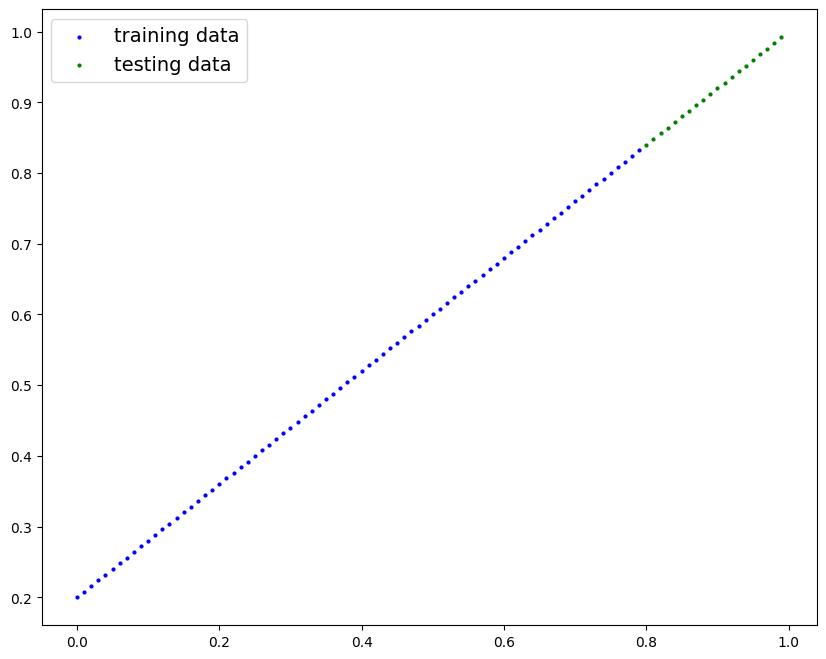

In [6]:
plotpredictions()

## Building Model

In [7]:

class LinearRegressionModel (nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [8]:
torch.manual_seed(42)
model0 = LinearRegressionModel()
model0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

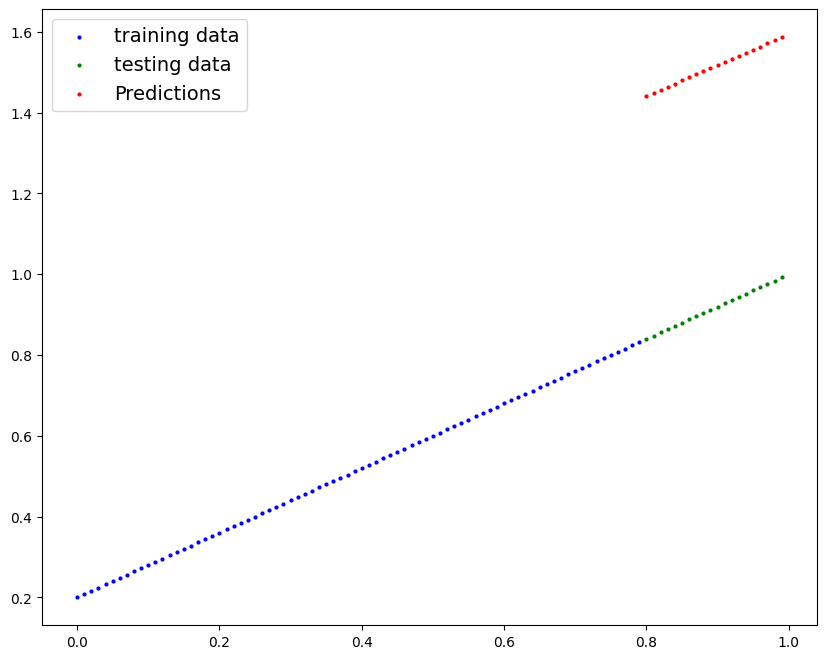

In [9]:
torch.manual_seed(42)
with torch.inference_mode():
    ypreds = model0(X_test)
    plotpredictions(predictions= ypreds)

## Train Model and Test Model

In [10]:
lossfn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model0.parameters(),
                            lr=0.001)

In [11]:
epoch = 1924
epochcount = []
losses = []
testlosses = []


X_test = X_test.to(device)
X_train = X_train.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)
model0.to(device)
for epoch in range(epoch):
    #Train
    model0.train()
    ypreds = model0(X_train)
    loss = lossfn(ypreds, Y_train)
    l = loss.cpu()
    losses.append(l)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epochcount.append(epoch)

    #Test
    model0.eval()
    with torch.inference_mode():
        testpreds = model0(X_test)
        testloss = lossfn(testpreds, Y_test)
        tl = testloss.cpu()
        testlosses.append(tl)

        if epoch%10 == 0:
            print(f'epoch = {epoch} || loss = {loss} || testloss = {testloss}')

epoch = 0 || loss = 0.6160006523132324 || testloss = 0.5969163775444031
epoch = 10 || loss = 0.6044405102729797 || testloss = 0.5833812952041626
epoch = 20 || loss = 0.5928804278373718 || testloss = 0.5698461532592773
epoch = 30 || loss = 0.5813202857971191 || testloss = 0.5563110709190369
epoch = 40 || loss = 0.5697601437568665 || testloss = 0.5427759289741516
epoch = 50 || loss = 0.5582000017166138 || testloss = 0.5292407870292664
epoch = 60 || loss = 0.5466399192810059 || testloss = 0.5157057046890259
epoch = 70 || loss = 0.5350797772407532 || testloss = 0.5021705627441406
epoch = 80 || loss = 0.5235196948051453 || testloss = 0.48863545060157776
epoch = 90 || loss = 0.5119595527648926 || testloss = 0.4751002788543701
epoch = 100 || loss = 0.5003994107246399 || testloss = 0.46156516671180725
epoch = 110 || loss = 0.4888392984867096 || testloss = 0.4480300545692444
epoch = 120 || loss = 0.4772791564464569 || testloss = 0.4344949722290039
epoch = 130 || loss = 0.4657190442085266 || tes

In [12]:
loss

tensor(0.0003, device='cuda:0', grad_fn=<MeanBackward0>)

In [13]:
model0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7997]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2010], device='cuda:0'))])

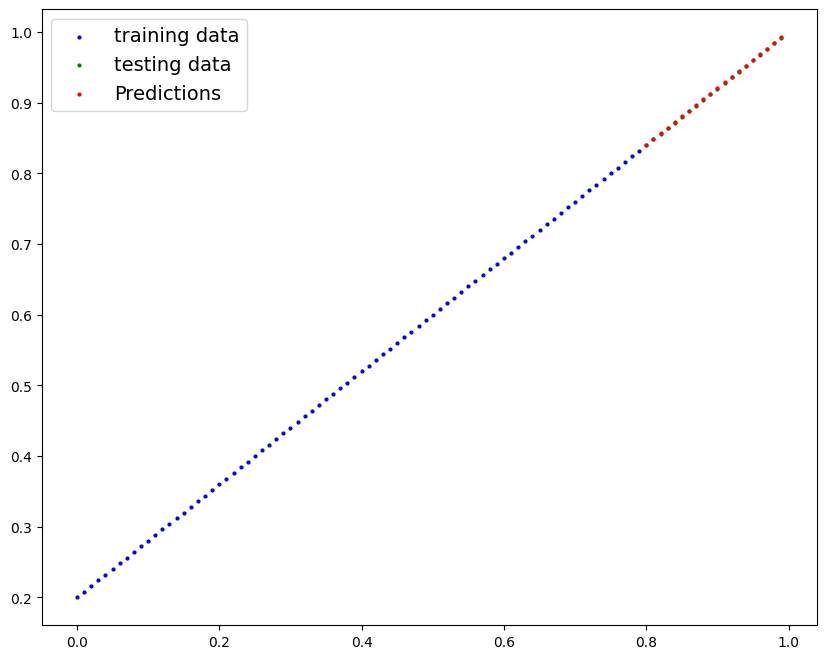

In [14]:
model0.eval()
with torch.inference_mode():
    ypred = model0(X_test)
plotpredictions(predictions= ypred.cpu())

## Loss Graphs

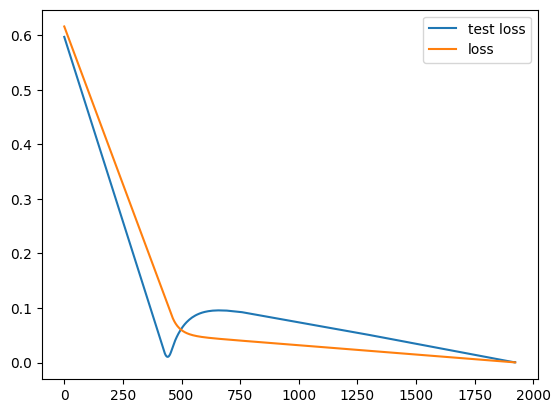

In [15]:
with torch.inference_mode():
    plt.plot(epochcount, testlosses, label="test loss")
    plt.plot(epochcount, losses, label="loss")
plt.legend()
plt.show()

In [16]:
## checking with a random value

In [20]:
model0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7997]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2010], device='cuda:0'))])

In [18]:
a = torch.tensor([40], dtype=torch.float32).to(device)
y = model0(a)
y

tensor([32.1885], device='cuda:0', grad_fn=<ViewBackward0>)

In [19]:
0.8*40+0.2

32.2